#Trabajo Práctico N°3


Importamos Spacy e instanciamos modelo

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

Importamos otras librerías




In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el .csv con el dataset

In [15]:
PATH = '/content/reviews_cleaned.csv'
dataset = pd.read_csv(PATH,on_bad_lines='skip')

Printeamos los 10 primeros datos del dataset

In [16]:
dataset.head(10)

,stars,comment,book_url
0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130
1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130
2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130
3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130
4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130
5,POS,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130
6,POS,important data science book readpick alongside...,https://www.amazon.com/dp/1492041130
7,POS,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130
8,NEG,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130
9,POS,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130


In [17]:
dataset.shape

(20647, 3)

In [18]:
df = dataset.copy()
df

,stars,comment,book_url
0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130
1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130
2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130
3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130
4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130
...,...,...,...
20642,NEU,book offer nice information thought think libr...,https://www.amazon.com/dp/0980200482
20643,POS,disabled retired rn wish librarianencourage gr...,https://www.amazon.com/dp/0980200482
20644,NEU,point consider library work oppose work litera...,https://www.amazon.com/dp/0980200482
20645,POS,overall think excellent resource pursue career...,https://www.amazon.com/dp/0980200482


In [19]:
df["comment"]= df["comment"].astype(str)

Regex para limpiar los digitos y algunos signos en el dataset

In [ ]:
import re

In [ ]:
pat_num = "\d+"
pat_num_regex = re.compile(pat_num)
reemplazo = ""

In [ ]:
pat_signo = "\s\W+"
pat_signo_regex = re.compile(pat_signo)

In [ ]:
pat_punt = "[^\w\s]"
pat_punt_regex = re.compile(pat_punt)


In [ ]:
df["comment"] = df["comment"].apply(lambda x: pat_num_regex.sub(reemplazo, x))
df["comment"] = df["comment"].apply(lambda x: pat_signo_regex.sub(reemplazo, x))
df["comment"] = df["comment"].apply(lambda x: pat_punt_regex.sub(reemplazo, x))
df['comment']

###Función para generar entidades a partir de texto

In [20]:
def get_entities(text):
  doc=nlp(text)
  ents = []
  if doc.ents:
    for ent in doc.ents:
      ents.append(ent.text)

  return ents

In [21]:
%%time
df["NER"] = df["comment"].apply(get_entities)

CPU times: user 4min 12s, sys: 803 ms, total: 4min 12s
Wall time: 4min 18s


In [22]:
df.head(10)

,stars,comment,book_url,NER
0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"[phd, ga, year ago, sci]"
1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[]
2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[]
3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,[phd]
4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"[decade, coin love, sas s r]"
5,POS,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130,[]
6,POS,important data science book readpick alongside...,https://www.amazon.com/dp/1492041130,[]
7,POS,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130,[]
8,NEG,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130,[]
9,POS,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130,[]


Explotamos el dataframe y lo agrupamos por la columna NER para mostrar las top20 entidades más repetidas

In [23]:
df_exploded = df.explode("NER")

In [24]:
df_exploded.groupby("NER").count().sort_values(by="comment", ascending=False).head(20)

,stars,comment,book_url
NER,,,
second,595,595,595
today,400,400,400
year,400,400,400
half,353,353,353
linear,196,196,196
one,178,178,178
american,169,169,169
daily,154,154,154
english,139,139,139


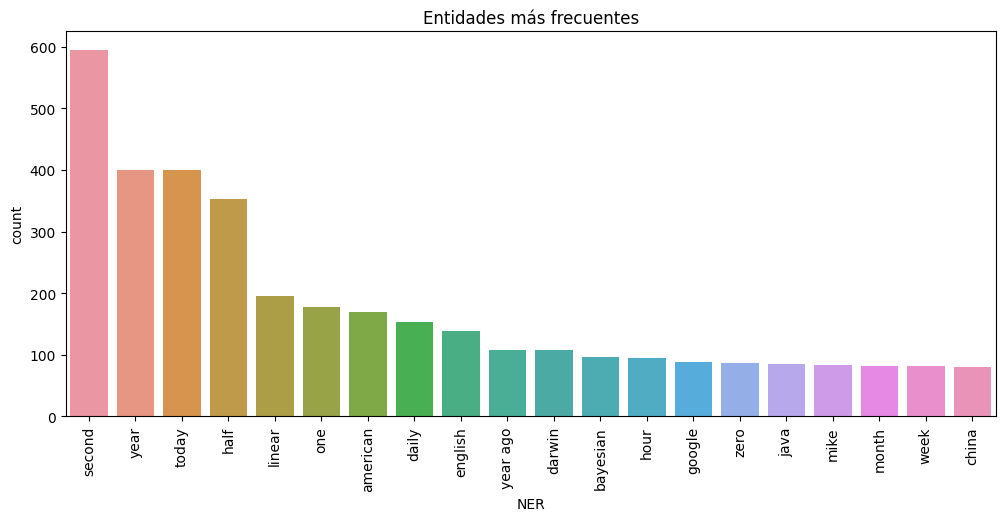

In [27]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes()
ax = sns.countplot(x='NER', data=df_exploded, order=df_exploded["NER"].value_counts()[:20].index)
plt.xticks(rotation=90)
plt.title("Entidades más frecuentes")
plt.show()

##Proceso para obtener nouns

In [28]:
def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [29]:
%%time
df["NOUNS"] = df["comment"].apply(get_nouns)

CPU times: user 4min 15s, sys: 682 ms, total: 4min 16s
Wall time: 4min 19s


In [30]:
df.tail()

,stars,comment,book_url,NER,NOUNS
20642,NEU,book offer nice information thought think libr...,https://www.amazon.com/dp/0980200482,[],"[book, information, editing, typos]"
20643,POS,disabled retired rn wish librarianencourage gr...,https://www.amazon.com/dp/0980200482,[],[librarianencourage]
20644,NEU,point consider library work oppose work litera...,https://www.amazon.com/dp/0980200482,[],"[point, library, work, work, literacy, profit,..."
20645,POS,overall think excellent resource pursue career...,https://www.amazon.com/dp/0980200482,[],"[resource, pursue, career, school, student, jo..."
20646,POS,great,https://www.amazon.com/dp/0980200482,[],[]


In [31]:
df_exploded2 = df.explode("NOUNS")
df_exploded2.groupby("NOUNS").count().sort_values(by="comment", ascending=False).head(20)

,stars,comment,book_url,NER
NOUNS,,,,
book,31652,31652,31652,31652
author,4510,4510,4510,4510
time,3492,3492,3492,3492
work,3454,3454,3454,3454
example,3418,3418,3418,3418
science,3335,3335,3335,3335
datum,3316,3316,3316,3316
way,3212,3212,3212,3212
data,2950,2950,2950,2950


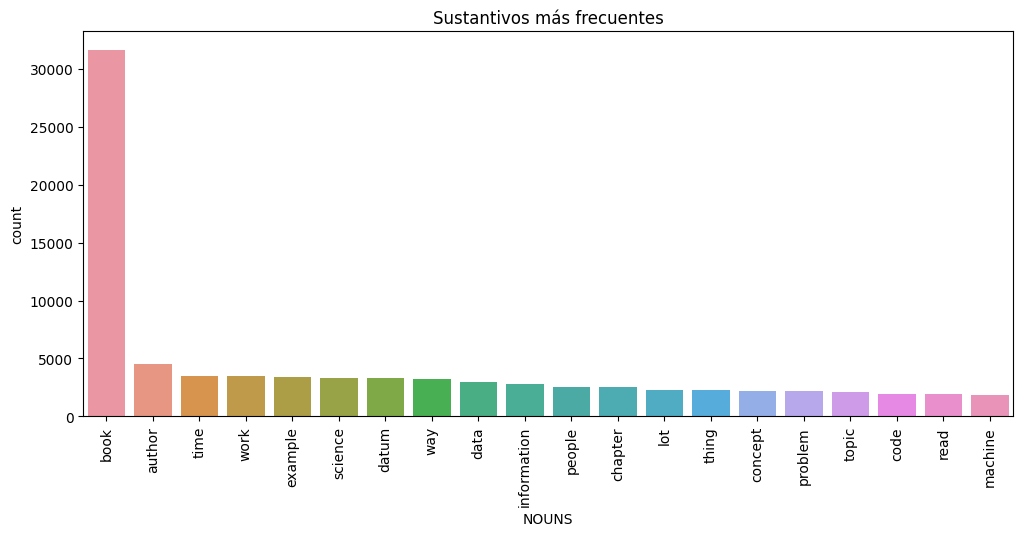

In [32]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes()
ax = sns.countplot(x='NOUNS', data=df_exploded2, order=df_exploded2["NOUNS"].value_counts()[:20].index)
plt.xticks(rotation=90)
plt.title("Sustantivos más frecuentes")
plt.show()

##Proceso para obtener noun chunks

In [33]:
def get_noun_chunks(text:str):
  doc = nlp(text)
  return [nc for nc in doc.noun_chunks]

In [34]:
%%time
df["NOUN_CHUNKS"] = df["comment"].apply(get_noun_chunks)

CPU times: user 4min 5s, sys: 1.06 s, total: 4min 6s
Wall time: 4min 8s


In [35]:
df.head()

,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS
0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"[phd, ga, year ago, sci]","[outset, respect, author, attack, phd, level, ...","[(outset, review, respect, author, sheer, guil..."
1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"[capitalism, read, book, bookstore, reviewer, ...","[(capitalism, good, read, book), (nearby, book..."
2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"[science, material, use, video, book, class, b...","[(datum, science, confused, material, use, vid..."
3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,[phd],"[book, variety, topic, detail, reader, trouble...","[(general, good, book), (wide, variety, topic)..."
4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"[decade, coin love, sas s r]","[datum, scientist, decade, term, coin, r, moth...","[(academic, datum, scientist, decade, term, co..."


##Proceso para obtener oraciones (sentecizer)

In [36]:
def get_sents(text):
  doc = nlp(text)
  return len(list(doc.sents))

In [37]:
%%time
df["SENTENCES"] = df["comment"].apply(get_sents)

CPU times: user 3min 55s, sys: 663 ms, total: 3min 55s
Wall time: 3min 56s


In [38]:
df.head(10)

,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS,SENTENCES
0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"[phd, ga, year ago, sci]","[outset, respect, author, attack, phd, level, ...","[(outset, review, respect, author, sheer, guil...",2
1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"[capitalism, read, book, bookstore, reviewer, ...","[(capitalism, good, read, book), (nearby, book...",2
2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"[science, material, use, video, book, class, b...","[(datum, science, confused, material, use, vid...",1
3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,[phd],"[book, variety, topic, detail, reader, trouble...","[(general, good, book), (wide, variety, topic)...",2
4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"[decade, coin love, sas s r]","[datum, scientist, decade, term, coin, r, moth...","[(academic, datum, scientist, decade, term, co...",1
5,POS,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130,[],"[book, approach, statistic, encounter, science...","[(book, nice, approach), (basic, statistic, en...",1
6,POS,important data science book readpick alongside...,https://www.amazon.com/dp/1492041130,[],"[science, book, course, information, end, chap...","[(important, data, science, book), (expensive,...",1
7,POS,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130,[],"[book, people, python, programming, skill, beg...","[(book, suitable, people), (basic, python, pro...",1
8,NEG,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130,[],"[probability, notation, mess, point, size, rea...","[(specifically, probability, notation, mess), ...",1
9,POS,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130,[],"[book, data, book, survey, material, detail, c...","[(book, data, science, great, fundamental, boo...",1


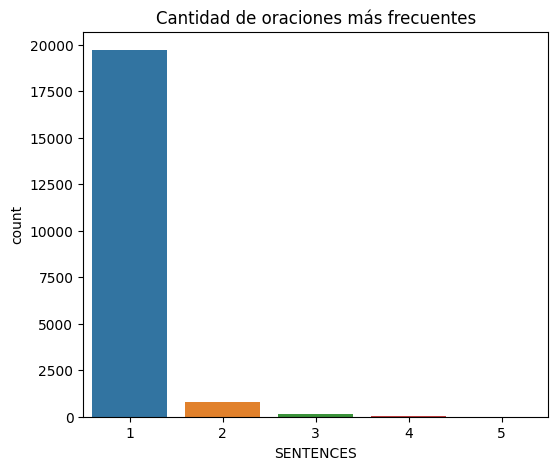

In [39]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax = sns.countplot(x='SENTENCES', data=df, order=df["SENTENCES"].value_counts()[:5].index)
plt.xticks(rotation=0)
plt.title("Cantidad de oraciones más frecuentes")
plt.show()

##Proceso para conseguir Wordcloud

In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words,
                       ).generate(str(df["comment"].values))

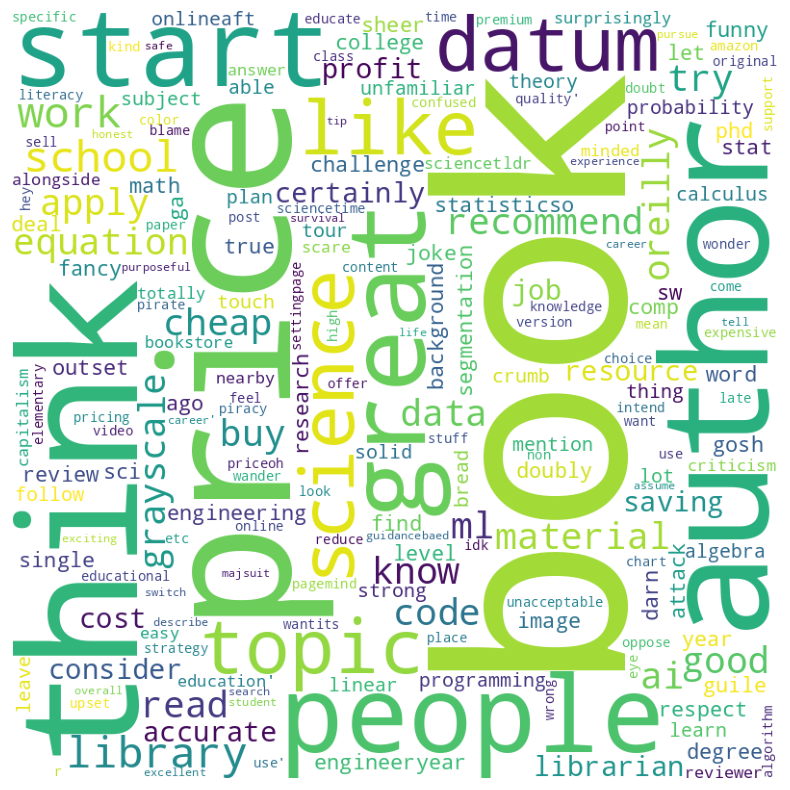

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## Análisis de sentimientos con Textblob

In [44]:
!pip install textblob

In [45]:
from textblob import TextBlob

In [46]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"

  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [47]:
%%time
df["SENTIMENT"] = df["comment"].apply(get_sentiment)

CPU times: user 11.1 s, sys: 57.6 ms, total: 11.1 s
Wall time: 14.2 s


In [48]:
df.head(20)

,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT
0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"[phd, ga, year ago, sci]","[outset, respect, author, attack, phd, level, ...","[(outset, review, respect, author, sheer, guil...",2,POS
1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"[capitalism, read, book, bookstore, reviewer, ...","[(capitalism, good, read, book), (nearby, book...",2,POS
2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"[science, material, use, video, book, class, b...","[(datum, science, confused, material, use, vid...",1,POS
3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,[phd],"[book, variety, topic, detail, reader, trouble...","[(general, good, book), (wide, variety, topic)...",2,NEU
4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"[decade, coin love, sas s r]","[datum, scientist, decade, term, coin, r, moth...","[(academic, datum, scientist, decade, term, co...",1,POS
5,POS,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130,[],"[book, approach, statistic, encounter, science...","[(book, nice, approach), (basic, statistic, en...",1,POS
6,POS,important data science book readpick alongside...,https://www.amazon.com/dp/1492041130,[],"[science, book, course, information, end, chap...","[(important, data, science, book), (expensive,...",1,NEU
7,POS,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130,[],"[book, people, python, programming, skill, beg...","[(book, suitable, people), (basic, python, pro...",1,POS
8,NEG,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130,[],"[probability, notation, mess, point, size, rea...","[(specifically, probability, notation, mess), ...",1,NEU
9,POS,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130,[],"[book, data, book, survey, material, detail, c...","[(book, data, science, great, fundamental, boo...",1,POS


##Análisis con las columnas generadas

¿Cuántas ORACIONES hay asociadas a cada sentimiento (POS, NEG, NEU) ?

In [49]:
df.groupby("SENTIMENT").agg({"SENTENCES": "sum"})

,SENTENCES
SENTIMENT,
NEG,1275
NEU,6050
POS,14492


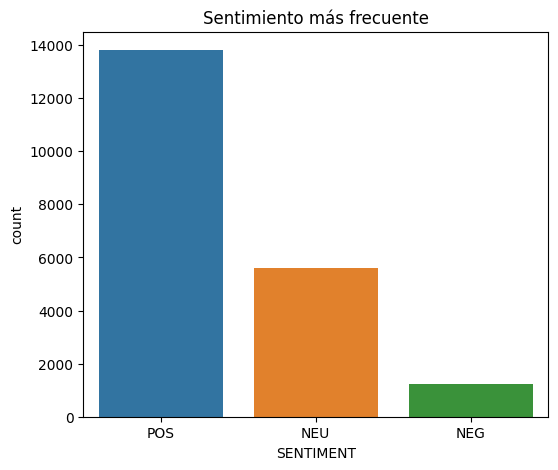

In [50]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax = sns.countplot(x='SENTIMENT', data=df, order=df["SENTIMENT"].value_counts()[:5].index)
plt.xticks(rotation=0)
plt.title("Sentimiento más frecuente")
plt.show()

¿Cuáles son los 10 sustantivos más negativos? Y los más positivos? (Noun)

In [54]:
noun_sentiments = df.explode("NOUNS").groupby(["NOUNS", "SENTIMENT"], as_index=False).agg({"comment": "count"})
#noun_sentiments.head(10)

In [55]:
noun_sentiments[noun_sentiments.SENTIMENT == "POS"].sort_values(by="comment", ascending=False).head(10)

,NOUNS,SENTIMENT,comment
3209,book,POS,21455
2023,author,POS,2741
8266,datum,POS,2315
28411,science,POS,2296
35560,work,POS,2269
11587,example,POS,2265
8193,data,POS,2141
35021,way,POS,2086
32827,time,POS,2066
16421,information,POS,1795


In [53]:
noun_sentiments[noun_sentiments.SENTIMENT == "NEG"].sort_values(by="comment", ascending=False).head(10)

,NOUNS,SENTIMENT,comment
3207,book,NEG,1493
2021,author,NEG,209
32825,time,NEG,190
2424,base,NEG,166
35019,way,NEG,128
11585,example,NEG,123
22313,page,NEG,117
35558,work,NEG,117
5648,class,NEG,116
4948,chapter,NEG,115


##Exportar el dataframe final como csv

In [56]:
df.to_csv("reviews_sentiments.csv")